<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Аналитика" data-toc-modified-id="Аналитика-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Аналитика</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Спрос на рейсы авиакомпании

Нам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

У нас есть файлы с результатами запросов из предыдущих заданий. Составление следующих датасетов выполнено при помощи SQL запросов в тренажере Яндекс.Практикум. В данном проекте выполняется только анализ полученных ранее данных.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

**Задача**:
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;

## Аналитика

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('/datasets/query_1.csv')
df2 = pd.read_csv('/datasets/query_3.csv')

In [3]:
display(df1)
display(df2)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [4]:
print(df1.info())
print('')
print(df2.info())
print(df2.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB
None
0


Файлы импортированы. Первый датасет состоит из 8 строк и 2 столбцов. В первом столбце содержится модель самолета, во втором - количество рейсов в сентябре 2018. Пропусков в данных нет, дубликатов тоже. Типы данных заданы верно, названия - object, целые числа - int64.

Второй датасет состоит из 101 строки и 2 столбцов. В первом столбце - названия городов, во втором - среднее количество рейсов, прибывающих в этот город за день в сентябре 2018 года. Пропусков в данных нет, дубликатов тоже. Типы данных заданы верно, названия - object, дробные числа - float64.

Столбцы в обоих датасетах названы корректно. Латиницей, в нижнем регистре, без пробелов

Создадим отдельную выборку из топ-10 городов по количеству рейсов в день

In [5]:
top10 = df2.sort_values(by='average_flights', ascending=False).head(10)
display(top10)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


Построим графики

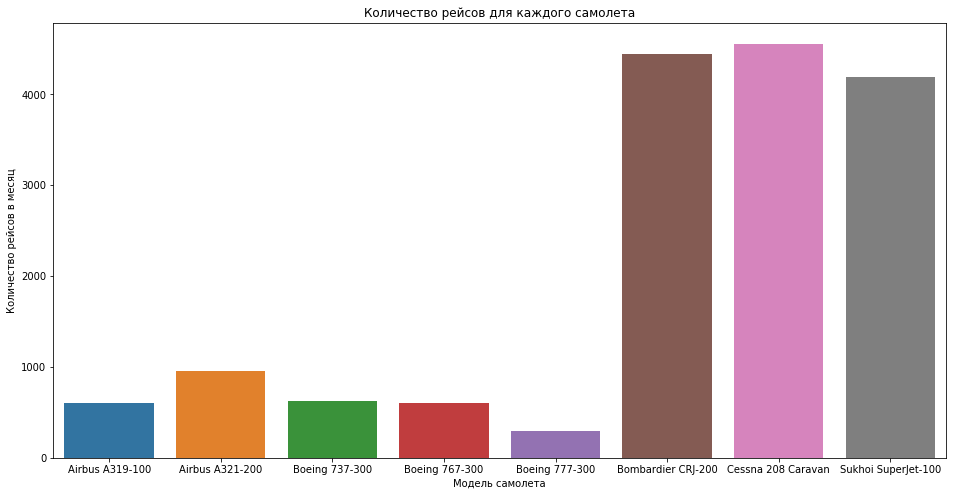

In [6]:
plt.figure(figsize=(16,8))
sns.barplot(data=df1, x='model', y='flights_amount')
plt.xlabel('Модель самолета')
plt.ylabel('Количество рейсов в месяц')
plt.title('Количество рейсов для каждого самолета')
plt.show()

Отчетливо видно, что рейсы больших самолетов Boeing значительно уступают по количеству любым другим, это происходит из-за отсутствия необходимости такой большой пассажировместимости и емкости топливного бака на большинстве рейсов в России, а то количество рейсов которое есть, скорее всего используется для заграничных перелетов. Самолёты Airbus совершают немного больше рейсов, чем Boeing, однако сильно уступают маленьким самолетам, таким как Bombsrdier и Cessna. Можно предположить, что во многих городах России отсутствует необходимость в большой вместимости самолетов, что объясняет такое количество рейсов Bombsrdier и Cessna, а Sukhoi - самолет отечественного производства, и стоит дешевле западных Airbus, скорее всего это основная причина, по которой он используется в России значительно чаще, хотя пассажировместимость сравнима с Airbus.

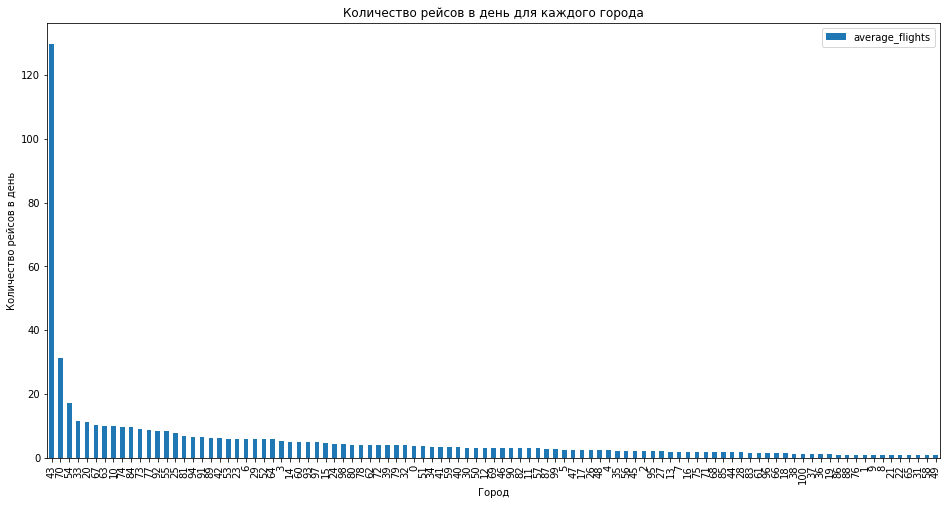

In [7]:
df2.sort_values(by='average_flights', ascending=False).plot(kind='bar', figsize=(16,8))
plt.xlabel('Город')
plt.ylabel('Количество рейсов в день')
plt.title('Количество рейсов в день для каждого города')
plt.show()

На данном графике отчетливо видно, что после первой десятки городов, ни один город не имеет более 10 рейсов в день. Это объясняется низкой плотностью населения в не столичных регионах страны, а также слабой развитостью инфраструктуры за пределами крупных городов.

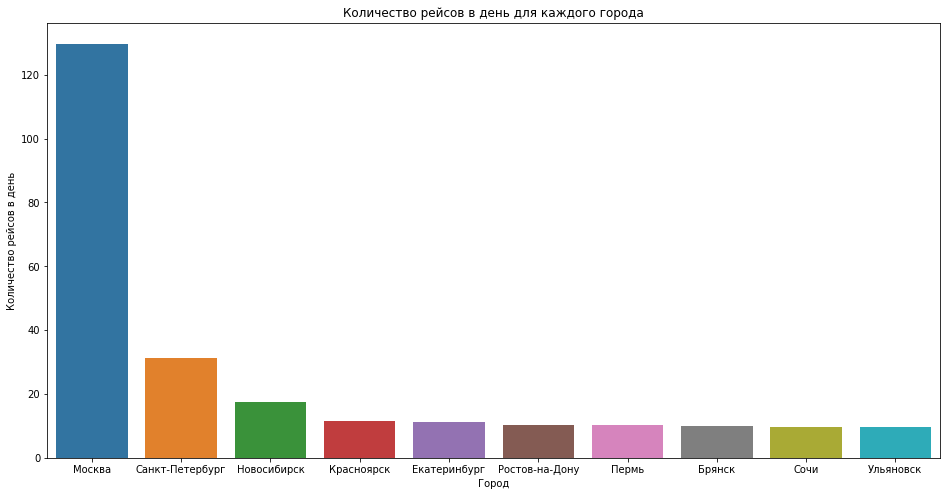

In [8]:
plt.figure(figsize=(16,8))
sns.barplot(data=top10, x='city', y='average_flights')
plt.xlabel('Город')
plt.ylabel('Количество рейсов в день')
plt.title('Количество рейсов в день для каждого города')
plt.show()

На данном графике видно, что Москва не просто самый многочисленный по населению город в стране, но и выступает как огромный транспортный узел, имея почти в 4 раза больше рейсов, чем следующий за ней Санкт-Петербург, который является вторым городом в стране, что и отражается на диаграмме. На третьем месте Новосибирск, который по совместительству третий город в стране по населению. Однако, несмотря на разницу в населениях между СПБ и Новосибирском в почти 4 раза, новосибирск имеет лиш на ~10 рейсов в день меньше. Новосибирск является достаточно загруженным аэропортом, так как выступает в роли крупного транспортного узла в Сибири. Все последующие города примерно похожи по размеру и населению на Новосибирск, однако не являются такими крупными транспортными узлами, поэтому все они имеют примерно одинаковое количество рейсов в день, которое соответствует крупности этих городов.

## Выводы

В данном проекте были выполнены задачи по извлечению данных при помощи SQL запросов, в рамках тренажёра.

Некоторые из полученных данных были проанализированы, были построены графики, написаны описания графиков.

Общей тенденцией для России является использование небольших самолетов, а так же, использование самолетов отечественного производства.

Количество рейсов по городам повторяет распределение городов по численности населения.